In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("CarPrice.csv")
meta = pd.read_csv("MetaData.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
X = df.drop(['price','car_ID', 'CarName'], axis=1)
y = df['price']

In [8]:
X

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [9]:
cat = ['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [10]:
for i in cat:
    print(i)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [11]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [12]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [13]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [14]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [15]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [16]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [17]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [95]:
df['enginetype'].value_counts()

ohc      146
ohcf      15
dohc      12
ohcv      12
l         11
rotor      4
Name: enginetype, dtype: int64

In [93]:
filt = df['enginetype'] == 'dohcv'

df[filt]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [94]:
df.drop(129, axis=0, inplace=True)

In [79]:
df['cylindernumber'].value_counts()

four     157
six       24
five      11
eight      5
two        4
Name: cylindernumber, dtype: int64

In [70]:
filt = df['cylindernumber'] == 'three'

df[filt]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [72]:
filt = df['cylindernumber'] == 'twelve'

df[filt]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


In [73]:
df.drop(49, axis=0, inplace=True)

In [71]:
df.drop(18, axis=0, inplace=True)

In [78]:
df['fuelsystem'].value_counts()

mpfi    93
2bbl    65
idi     20
1bbl    11
spdi     9
4bbl     3
Name: fuelsystem, dtype: int64

In [74]:
filt = df['fuelsystem'] == 'mfi'

df[filt]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [75]:
df.drop(29, axis=0, inplace=True)

In [76]:
filt = df['fuelsystem'] == 'spfi'

df[filt]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
46,47,2,isuzu D-Max,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


In [77]:
df.drop(46, axis=0, inplace=True)

In [21]:
#'fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [22]:
new = pd.get_dummies(df, drop_first=True,columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

In [23]:
new.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [24]:
df.shape

(205, 26)

In [25]:
new.shape

(205, 46)

In [26]:
X = new.drop(['price','car_ID', 'CarName'], axis=1)
y = new['price']

In [27]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [28]:
feature_names = [i for i in range(X.shape[1])]

In [29]:
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

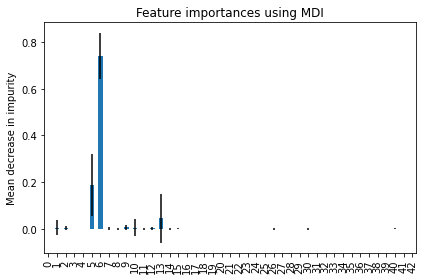

In [30]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [31]:
arr = regr.feature_importances_

In [32]:
df_f = pd.DataFrame(arr, index = X.columns)
df_f

,0
symboling,0.000000
wheelbase,0.004828
carlength,0.002768
carwidth,0.000000
carheight,0.000000
curbweight,0.186633
enginesize,0.739886
boreratio,0.001161
stroke,0.000893
compressionratio,0.006578


In [33]:
df_f.sort_values(0, ascending=False)

,0
enginesize,0.739886
curbweight,0.186633
highwaympg,0.046384
compressionratio,0.006578
horsepower,0.006066
wheelbase,0.004828
carlength,0.002768
citympg,0.001857
boreratio,0.001161
stroke,0.000893


In [34]:
data = new[['enginesize','curbweight','highwaympg','compressionratio','horsepower','wheelbase','carlength','citympg','boreratio',
   'stroke','fueltype_gas','peakrpm','aspiration_turbo','enginetype_ohc','fuelsystem_mpfi','cylindernumber_five','fuelsystem_idi','price']]

In [35]:
data['avg_mpg'] = (data['citympg']+data['highwaympg'])/2

C:\Users\DATTA\AppData\Local\Temp\ipykernel_16652\2381702432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_mpg'] = (data['citympg']+data['highwaympg'])/2


In [36]:
X = data.drop(['price', 'citympg', 'highwaympg','fueltype_gas'], axis=1)
y = data['price']

In [37]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y)

In [38]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train_x, train_y)

RandomForestRegressor(max_depth=2, random_state=0)

In [39]:
arr = regr.feature_importances_

In [40]:
df_f = pd.DataFrame(arr, index = X.columns)
df_f

,0
enginesize,0.751420
curbweight,0.172267
compressionratio,0.005574
horsepower,0.024929
wheelbase,0.004346
carlength,0.007949
boreratio,0.002992
stroke,0.000000
peakrpm,0.000374
aspiration_turbo,0.000000


In [62]:
n = x_test.shape[0]
k = x_test.shape[1]

In [60]:
y_pred = regr.predict(train_x)

mse = mean_squared_error(train_y,y_pred)
print(f"MSE= {mse}")

r2 = r2_score(train_y,y_pred)
print(f"R- Sequred Value = {r2}")

adjusted_r2_score = 1 - (((1-r2)*(n-1)) /  (n - k - 1))
print(f"Adjusted R- Sequared Value = {adjusted_r2_score}")

mae = mean_absolute_error(train_y,y_pred)
print(f"MAE = {mae}")

print(f"RMSE = {np.sqrt(mse)}")

MSE= 5548033.052389833
R- Sequred Value = 0.9216302292026433
Adjusted R- Sequared Value = 0.9142475696347763
MAE = 1799.1678766061239
RMSE = 2355.4262995028803


In [63]:
y_pred = regr.predict(test_x)

mse = mean_squared_error(test_y,y_pred)
print(f"MSE= {mse}")

r2 = r2_score(test_y,y_pred)
print(f"R- Sequred Value = {r2}")

adjusted_r2_score = 1 - (((1-r2)*(n-1)) /  (n - k - 1))
print(f"Adjusted R- Sequared Value = {adjusted_r2_score}")

mae = mean_absolute_error(test_y,y_pred)
print(f"MAE = {mae}")

print(f"RMSE = {np.sqrt(mse)}")

MSE= 6648831.183913385
R- Sequred Value = 0.8382594758257976
Adjusted R- Sequared Value = 0.7054011881112743
MAE = 2012.6569782472293
RMSE = 2578.5327579678687


In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
linregr = LinearRegression()
linregr.fit(train_x, train_y)

LinearRegression()

In [66]:
y_pred = linregr.predict(train_x)

mse = mean_squared_error(train_y,y_pred)
print(f"MSE= {mse}")

r2 = r2_score(train_y,y_pred)
print(f"R- Sequred Value = {r2}")

adjusted_r2_score = 1 - (((1-r2)*(152-1)) /  (152 - 13 - 1))
print(f"Adjusted R- Sequared Value = {adjusted_r2_score}")

mae = mean_absolute_error(train_y,y_pred)
print(f"MAE = {mae}")

print(f"RMSE = {np.sqrt(mse)}")

MSE= 8915057.025511794
R- Sequred Value = 0.8740687070287425
Adjusted R- Sequared Value = 0.8622056142126096
MAE = 2277.0425997784955
RMSE = 2985.809274805039


In [67]:
y_pred = linregr.predict(test_x)

mse = mean_squared_error(test_y,y_pred)
print(f"MSE= {mse}")

r2 = r2_score(test_y,y_pred)
print(f"R- Sequred Value = {r2}")

adjusted_r2_score = 1 - (((1-r2)*(n-1)) /  (n - k - 1))
print(f"Adjusted R- Sequared Value = {adjusted_r2_score}")

mae = mean_absolute_error(test_y,y_pred)
print(f"MAE = {mae}")

print(f"RMSE = {np.sqrt(mse)}")

MSE= 11206970.195363294
R- Sequred Value = 0.727377461742705
Adjusted R- Sequared Value = 0.5034375196027842
MAE = 2473.0864595983744
RMSE = 3347.6813162789695


In [ ]:
df.head()

In [ ]:
df.info()

In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [98]:
from sklearn.compose import make_column_transformer

In [99]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['fueltype', 'aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']),
    (MinMaxScaler(), ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])
    
)

In [100]:
X = df.drop(['price','car_ID', 'CarName'], axis=1)
y = df['price']

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [102]:
column_trans.fit_transform(x_train, y_train)

array([[0.        , 1.        , 0.        , ..., 0.55102041, 0.28571429,
        0.36842105],
       [0.        , 1.        , 1.        , ..., 0.24489796, 0.05714286,
        0.05263158],
       [1.        , 0.        , 0.        , ..., 0.        , 0.4       ,
        0.44736842],
       ...,
       [0.        , 1.        , 1.        , ..., 0.34693878, 0.2       ,
        0.28947368],
       [0.        , 1.        , 1.        , ..., 0.55102041, 0.65714286,
        0.65789474],
       [0.        , 1.        , 1.        , ..., 0.44897959, 0.37142857,
        0.47368421]])

In [103]:
from sklearn.pipeline import make_pipeline

In [104]:
linregr = LinearRegression()

In [105]:
pipe = make_pipeline(column_trans, linregr)

In [106]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'car

In [107]:
test_x.head()

,enginesize,curbweight,compressionratio,horsepower,wheelbase,carlength,boreratio,stroke,peakrpm,aspiration_turbo,enginetype_ohc,fuelsystem_mpfi,cylindernumber_five,fuelsystem_idi,avg_mpg
31,92,1819,9.2,76,86.6,144.6,2.91,3.410,6000,0,1,0,0,0,34.5
152,92,2015,9.0,62,95.7,158.7,3.05,3.030,4800,0,1,0,0,0,34.5
133,121,2695,9.3,110,99.1,186.6,3.54,3.070,5250,0,1,1,0,0,24.5
12,164,2710,9.0,121,101.2,176.8,3.31,3.190,4250,0,1,1,0,0,24.5
55,70,2380,9.4,101,95.3,169.0,3.33,3.255,6000,0,0,0,0,0,20.0


In [108]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [109]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [112]:
n = x_train.shape[0]
k = x_train.shape[1]

In [115]:
y_pred = pipe.predict(x_train)

mse = mean_squared_error(y_train,y_pred)
print(f"MSE= {mse}")

r2 = r2_score(y_train,y_pred)
print(f"R- Sequred Value = {r2}")

adjusted_r2_score = 1 - (((1-r2)*(n-1)) /  (n - k - 1))
print(f"Adjusted R- Sequared Value = {adjusted_r2_score}")

mae = mean_absolute_error(y_train,y_pred)
print(f"MAE = {mae}")

print(f"RMSE = {np.sqrt(mse)}")

MSE= 3764513.914505927
R- Sequred Value = 0.9345267412428879
Adjusted R- Sequared Value = 0.9225752733745262
MAE = 1410.3288866666664
RMSE = 1940.2355306781512


In [111]:
y_pred = pipe.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print(f"MSE= {mse}")

r2 = r2_score(y_test,y_pred)
print(f"R- Sequred Value = {r2}")

adjusted_r2_score = 1 - (((1-r2)*(n-1)) /  (n - k - 1))
print(f"Adjusted R- Sequared Value = {adjusted_r2_score}")

mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {mae}")

print(f"RMSE = {np.sqrt(mse)}")

MSE= 7685374.485
R- Sequred Value = 0.888058237898767
Adjusted R- Sequared Value = 0.7961060761727543
MAE = 1947.33
RMSE = 2772.2507976371835


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(regr, X, y, cv=5, scoring='accuracy').mean()

C:\Users\DATTA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DATTA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\DATTA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\DATTA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\DATTA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\DATTA\anaconda3\lib\site-packages\sklearn\metrics\_classification

nan

In [44]:
y_pred = regr.predict(X)
model_eval(y,y_pred)

NameError: name 'model_eval' is not defined

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y_pred = regr.predict(X)

mse = mean_squared_error(y,y_pred)
print(f"MSE= {mse}")

r2 = r2_score(y,y_pred)
print(f"R- Sequred Value = {r2}")

adjusted_r2_score = 1 - (((1-r2)*(152-1)) /  (152 - 13 - 1))
print(f"Adjusted R- Sequared Value = {adjusted_r2_score}")

mae = mean_absolute_error(y,y_pred)
print(f"MAE = {mae}")

print(f"RMSE = {np.sqrt(mse)}")

In [ ]:
forest_importances = pd.Series(importances, index=X.columns)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
forest_importances = pd.Series(importances, index=X.columns)

# f = plt.figure()
# f.set_figwidth(41)
# f.set_figheight(11)

fig, ax = plt.subplots(figsize=(40, 10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# f = plt.figure()
# f.set_figwidth(4)
# f.set_figheight(1)
  
# print("Plot after re-sizing: ")
# plt.plot(x, y)
# plt.show()

In [ ]:
df['enginesize'].value_counts()

In [ ]:
df['doornumber'].value_counts()

In [ ]:
 filt = df['doornumber'] == 'two'
sum(df[filt]['price'])/len(df[filt])

In [ ]:
 filt = df['doornumber'] == 'four'
sum(df[filt]['price'])/len(df[filt])

In [ ]:
df['price'].describe()

In [ ]:
df['price'].plot(kind='hist')

In [ ]:
# Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, 
# -3 that it is probably pretty safe.(Categorical) 
df['symboling'].value_counts()

In [ ]:
(df['symboling'].value_counts()/len(df['symboling']))*100

In [ ]:
filt = df['symboling'] == -1

In [ ]:
def avg(symb):
    filt = df['symboling'] == symb
    av = sum(df[filt]['price'])/len(df[filt])
    return av
    

In [ ]:
symboling = [ -1, -2, 0, 1, 2, 3]

for i in symboling:
    a = avg(i)
    print(f'{i} >> {a}')

In [ ]:
avg(0)

In [ ]:
avg(1)

In [ ]:
avg(2)

In [ ]:
avg(3)

In [ ]:
avg(-1)

In [ ]:
avg(-2)

In [ ]:
symboling = []

In [ ]:
#total average price
sum(df['price'])/len(df['price'])

In [ ]:
#average price symboling = 0
sum(df[filt]['price'])/len(df[filt])

In [ ]:
#average price symboling = 1
sum(df[filt]['price'])/len(df[filt])

In [ ]:
#average price symboling = 2
sum(df[filt]['price'])/len(df[filt])

In [ ]:
#average price symboling = 3
sum(df[filt]['price'])/len(df[filt])

In [ ]:
#average price symboling = -1
sum(df[filt]['price'])/len(df[filt])

In [ ]:
#average price symboling = -2
sum(df[filt]['price'])/len(df[filt])

In [ ]:
df[filt]

In [ ]:
df['drivewheel'].value_counts()

In [ ]:
meta['Unique id of each observation (Interger)'][0]

In [ ]:
##**Source: https://archive.ics.uci.edu/ml/datasets/Automobile